In [2]:
!pip install pandas

In [3]:
!pip install xlrd

In [4]:
import pandas as pd
data_df = pd.read_excel('Credit Banking_Project1.xls',sheet_name='Customer Acqusition')
#Calculating the mean of ages > 18
mean_age = data_df.loc[data_df['Age']>18 , 'Age'].mean()
#Replacing ages < 18 with mean age
data_df.loc[data_df['Age']<18,'Age'] = mean_age
print(data_df)

    Sl No: Customer        Age        City Credit Card Product   Limit  \
0        1       A1  49.292424   BANGALORE                Gold  500000   
1        2       A2  35.534551    CALCUTTA              Silver  100000   
2        3       A3  49.292424      COCHIN            Platimum   10000   
3        4       A4  45.820278      BOMBAY            Platimum   10001   
4        5       A5  69.663948   BANGALORE            Platimum   10002   
..     ...      ...        ...         ...                 ...     ...   
95      96      A96  29.631637     CHENNAI              Silver  100000   
96      97      A97  20.611833  TRIVANDRUM            Platimum   10000   
97      98      A98  40.538985    CALCUTTA            Platimum   10001   
98      99      A99  21.588666    CALCUTTA            Platimum   10002   
99     100     A100  23.607638      COCHIN              Silver  100000   

   Company        Segment  
0       C1  Self Employed  
1       C2   Salaried_MNC  
2       C3   Salaried_Pvt  

In [5]:
data_df1 = pd.read_excel('Credit Banking_Project1.xls',sheet_name='Spend')
date_column = data_df1['Month']
date_column = pd.to_datetime(date_column)
data_df1['Year'] = date_column.dt.year
data_df1['Month'] = date_column.dt.month
data_df1['Day'] = date_column.dt.day
#Grouping the data by customer year and month
grouped_df = data_df1.groupby(['Customer', 'Year', 'Month'])
#Calculating the monthly spend
monthly_spend = grouped_df['Spend'].sum().reset_index()

data_df2 = pd.read_excel('Credit Banking_Project1.xls',sheet_name='Repayment')
date_column2 = data_df2['Month']
date_column2 = pd.to_datetime(date_column2)
data_df2['Year'] = date_column2.dt.year
data_df2['Month'] = date_column2.dt.month
data_df2['Day'] = date_column2.dt.day
grouped_df2 = data_df2.groupby(['Customer', 'Year', 'Month'])
#Calculating the monthly repayment
monthly_repayment = grouped_df2['Amount'].sum().reset_index()

spend_df = pd.DataFrame(monthly_spend)
repayment_df = pd.DataFrame(monthly_repayment)

merged_data = pd.merge(spend_df, repayment_df,how="outer")
merged_data.fillna(0,inplace=True)
merged_data.sort_values(['Customer', 'Year','Month'], ascending=True)

merged_data['Surplus'] = merged_data['Amount'] - merged_data['Spend']
merged_data['Surplus'] = merged_data['Surplus'] * 0.02
merged_data.loc[merged_data['Surplus'] < 0, 'Surplus'] = 0

merged_data['Surplus'] = merged_data['Surplus'].shift(+1)
first_row_indices = merged_data.groupby('Customer').head(1).index
merged_data.loc[first_row_indices, 'Surplus'] = 0

#Calculating next month repayment amount
merged_data['Amount'] = merged_data['Amount'] - merged_data['Surplus']
merged_data['Surplus'] = merged_data['Surplus'].shift(-1)
merged_data['Surplus'] = merged_data['Surplus'].fillna(0)

print(merged_data)

     Customer  Year  Month         Spend        Amount      Surplus
0          A1  2004      1  1.511173e+06  1.362775e+06     0.000000
1          A1  2004      2  4.138111e+04  1.911800e+05  2995.978115
2          A1  2004      5  1.311966e+05 -2.995978e+03     0.000000
3          A1  2005      1  3.984038e+05  1.581970e+03     0.000000
4          A1  2005      2  1.404193e+06  1.199808e+06     0.000000
...       ...   ...    ...           ...           ...          ...
1097       A8  2006      1  0.000000e+00  3.155330e+05  6366.227588
1098       A8  2006      2  0.000000e+00  1.420453e+05  2968.231161
1099       A8  2006      4  0.000000e+00  1.231312e+05  2521.988343
1100       A8  2006      5  0.000000e+00  7.813049e+04  1613.049659
1101       A9  2004      2  0.000000e+00  3.832813e+05     0.000000

[1102 rows x 6 columns]


In [6]:
#TASK 1: MONTHLY SPEND OF EACH CUSTOMER

data_df1 = pd.read_excel('Credit Banking_Project1.xls', sheet_name = 'Spend')
date_column = data_df1['Month']
date_column = pd.to_datetime(date_column)
data_df1['Year'] = date_column.dt.year
data_df1['Month'] = date_column.dt.month
data_df1['Day'] = date_column.dt.day
grouped_df = data_df1.groupby(['Customer', 'Year', 'Month'])
monthly_spend = grouped_df['Spend'].sum().reset_index()
print(monthly_spend)

    Customer  Year  Month         Spend
0         A1  2004      1  1.511173e+06
1         A1  2004      2  4.138111e+04
2         A1  2004      5  1.311966e+05
3         A1  2005      1  3.984038e+05
4         A1  2005      2  1.404193e+06
..       ...   ...    ...           ...
802      A95  2004      1  3.478339e+05
803      A96  2004      1  3.203635e+05
804      A97  2004      1  1.643300e+05
805      A98  2004      1  8.748351e+04
806      A99  2004      1  4.760204e+05

[807 rows x 4 columns]


In [7]:
#TASK 2: MONTHLY REPAYMENT OF EACH CUSTOMER

selected_columns = ['Customer', 'Year', 'Month','Amount']
#Accessing the repayment amount data calculated while data cleaning
monthly_repayment = merged_data[selected_columns]
print(monthly_repayment)

     Customer  Year  Month        Amount
0          A1  2004      1  1.362775e+06
1          A1  2004      2  1.911800e+05
2          A1  2004      5 -2.995978e+03
3          A1  2005      1  1.581970e+03
4          A1  2005      2  1.199808e+06
...       ...   ...    ...           ...
1097       A8  2006      1  3.155330e+05
1098       A8  2006      2  1.420453e+05
1099       A8  2006      4  1.231312e+05
1100       A8  2006      5  7.813049e+04
1101       A9  2004      2  3.832813e+05

[1102 rows x 4 columns]


In [8]:
#TASK 3: HIGHEST PAYING 10 CUSTOMERS

grouped_df = monthly_repayment.groupby(['Customer'])
total_repayment = grouped_df['Amount'].sum().reset_index()
highest_paying = total_repayment.sort_values('Amount', ascending = False)
top_10_customers = highest_paying.head(10)
print("HIGHEST PAYING 10 CUSTOMERS ARE:\n",top_10_customers)


HIGHEST PAYING 10 CUSTOMERS ARE:
    Customer        Amount
15      A22  9.678064e+06
57      A60  9.204670e+06
35      A40  8.733609e+06
58      A61  8.725198e+06
42      A47  8.452357e+06
43      A48  8.383701e+06
38      A43  8.381830e+06
36      A41  8.298990e+06
44      A49  8.183099e+06
40      A45  8.051999e+06


In [9]:
#TASK 4: IN WHICH SEGMENT PEOPLE ARE SPENDING MORE MONEY

data_df1 = pd.read_excel('Credit Banking_Project1.xls',sheet_name='Customer Acqusition')
data_df2 = pd.read_excel('Credit Banking_Project1.xls',sheet_name='Spend')
grouped_df2 = data_df2.groupby(['Customer'])
total_spend_df2 = grouped_df2['Spend'].sum().reset_index()
merged_df = pd.merge(data_df1, total_spend_df2, on='Customer')
segment_spending = merged_df.groupby('Segment')['Spend'].sum()
segment_spending = segment_spending.sort_values(ascending=False)
top_segment = segment_spending.head(1)
print(top_segment)

Segment
Normal Salary    1.077071e+08
Name: Spend, dtype: float64


In [10]:
#TASK 5: WHICH AGE GROUP IS SPENDING MORE MONEY

merge_df = pd.merge(data_df, total_spend_df2, on='Customer')
age_spending = merge_df.sort_values('Spend', ascending=False)
selected_columns = ['Age','Spend']
age_spending = age_spending[selected_columns].head(10)
highest_age_spending = age_spending.head(1)
print(highest_age_spending)

          Age         Spend
21  36.922773  9.637819e+06


In [11]:
#TASK 6: WHICH IS THE MOST PROFITABLE SEGMENT

grouped_df1 = monthly_spend.groupby(['Customer'])
total_spend_df1 = grouped_df1['Spend'].sum().reset_index()

grouped_df2 = monthly_repayment.groupby(['Customer'])
total_repayment_df2 = grouped_df2['Amount'].sum().reset_index()

mergeboth_df = pd.merge(total_spend_df1, total_repayment_df2, on='Customer')
mergeall_df = pd.merge(data_df, mergeboth_df, on='Customer')
mergeall_df['Profit'] = mergeall_df['Spend'] - mergeall_df['Amount']

profitable_segment = mergeall_df.groupby('Segment')['Profit'].sum()
profitable_segment = profitable_segment.sort_values(ascending = False)

top_profitable_segment = profitable_segment.head(1)
print(top_profitable_segment)

Segment
Salaried_Pvt    6.541625e+06
Name: Profit, dtype: float64


In [12]:
#TASK 7: IN WHICH CATEGORY CUSTOMERS ARE SPENDING MORE MONEY

data_df1 = pd.read_excel('Credit Banking_Project1.xls', sheet_name = 'Spend')
group_df = data_df1.groupby(['Type'])
categoryspend_df = group_df['Spend'].sum().reset_index()
categoryspend_df = categoryspend_df.sort_values('Spend', ascending=False)
highest_category = categoryspend_df.head(1)
print(highest_category)

     Type         Spend
10  PETRO  5.102258e+07


In [13]:
#TASK 8: MONTHLY PROFIT FOR THE BANK

grouped_df = monthly_spend.groupby(['Year', 'Month'])
yearly_spend = grouped_df['Spend'].sum().reset_index()

grouped_df2 = monthly_repayment.groupby(['Year', 'Month'])
yearly_repayment = grouped_df2['Amount'].sum().reset_index()

spend_df = pd.DataFrame(yearly_spend)
repayment_df = pd.DataFrame(yearly_repayment)

monthly_profit = pd.merge(spend_df, repayment_df, on=['Month','Year'])
monthly_profit.sort_values(['Year', 'Month'], ascending=True)

monthly_profit['Profit'] = monthly_profit['Spend'] - monthly_profit['Amount']
monthly_profit.loc[monthly_profit['Profit'] < 0, 'Profit'] = 0
print(monthly_profit)


    Year  Month         Spend        Amount        Profit
0   2004      1  7.519863e+07  6.775344e+07  7.445193e+06
1   2004      2  7.306151e+06  5.330040e+06  1.976111e+06
2   2004      3  3.964728e+06  4.241408e+06  0.000000e+00
3   2004      4  6.655481e+06  6.559700e+06  9.578064e+04
4   2004      5  4.170904e+06  5.416636e+06  0.000000e+00
5   2004      9  3.997664e+06  5.415115e+06  0.000000e+00
6   2004     11  4.009901e+06  2.934179e+06  1.075722e+06
7   2005      1  8.086675e+06  8.011265e+06  7.541075e+04
8   2005      2  4.114043e+07  4.098418e+07  1.562511e+05
9   2005      4  7.834609e+06  6.845709e+06  9.889001e+05
10  2005      5  3.700384e+07  3.588208e+07  1.121758e+06
11  2005      6  1.117559e+07  8.892882e+06  2.282706e+06
12  2005      7  3.311205e+06  3.010972e+06  3.002328e+05
13  2005      8  7.278593e+06  9.097268e+06  0.000000e+00
14  2005      9  3.427555e+06  3.078821e+06  3.487348e+05
15  2005     10  2.969110e+06  2.990359e+06  0.000000e+00
16  2005     1

In [14]:
#TASK 9: IMPOSE AN INTEREST RATE OF 2.9% FOR EACH CUSTOMER FOR ANY DUE AMOUNT

spend_df = pd.DataFrame(monthly_spend)
repayment_df = pd.DataFrame(monthly_repayment)
interest_data = pd.merge(spend_df, repayment_df,how="outer")
interest_data.fillna(0,inplace=True)
interest_data.sort_values(['Customer', 'Year','Month'], ascending=True)

interest_data['Interest'] = interest_data['Spend'] - interest_data['Amount']
interest_data['Interest'] = interest_data['Interest'] * 0.029
interest_data.loc[interest_data['Interest'] < 0, 'Interest'] = 0

interest_data['Interest'] = interest_data['Interest'].shift(+1)
first_row_indices = interest_data.groupby('Customer').head(1).index
interest_data.loc[first_row_indices, 'Interest'] = 0

interest_data['Amount'] = interest_data['Amount'] + interest_data['Interest']
interest_data['Interest'] = interest_data['Interest'].shift(-1)
interest_data['Interest'] = interest_data['Interest'].fillna(0)
print(interest_data)

     Customer  Year  Month         Spend        Amount      Interest
0          A1  2004      1  1.511173e+06  1.362775e+06   4303.527824
1          A1  2004      2  4.138111e+04  1.954835e+05      0.000000
2          A1  2004      5  1.311966e+05 -2.995978e+03   3891.584412
3          A1  2005      1  3.984038e+05  5.473554e+03  11507.832258
4          A1  2005      2  1.404193e+06  1.211315e+06   5927.177104
...       ...   ...    ...           ...           ...           ...
1097       A8  2006      1  0.000000e+00  3.155330e+05      0.000000
1098       A8  2006      2  0.000000e+00  1.420453e+05      0.000000
1099       A8  2006      4  0.000000e+00  1.231312e+05      0.000000
1100       A8  2006      5  0.000000e+00  7.813049e+04      0.000000
1101       A9  2004      2  0.000000e+00  3.832813e+05      0.000000

[1102 rows x 6 columns]


In [15]:

!pip install openpyxl

In [16]:
!pip install matplotlib seaborn --upgrade --quiet

In [17]:
#PLOTTING GRAPHS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

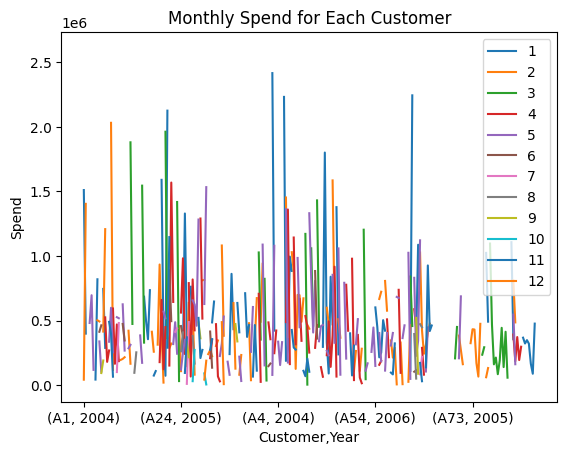

In [18]:
#TASK-1 PLOT
pivot_table = monthly_spend.pivot(index=['Customer','Year'], columns='Month', values='Spend')
pivot_table.plot()

plt.xlabel('Customer,Year')
plt.ylabel('Spend')
plt.title('Monthly Spend for Each Customer')

plt.legend()
plt.show()

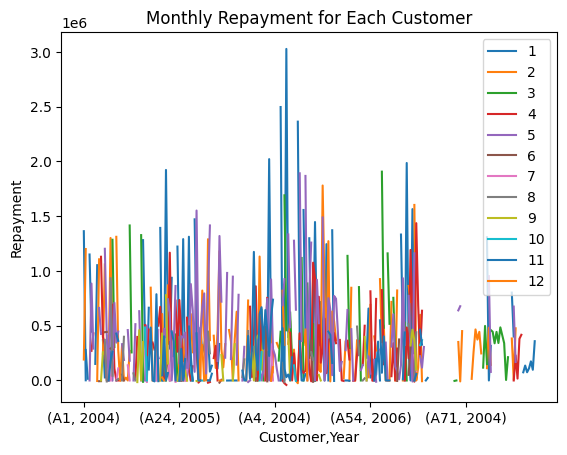

In [19]:
#TASK-2 PLOT
pivot_table = monthly_repayment.pivot(index=['Customer','Year'], columns='Month', values='Amount')
pivot_table.plot()

plt.xlabel('Customer,Year')
plt.ylabel('Repayment')
plt.title('Monthly Repayment for Each Customer')

plt.legend()
plt.show()

Text(0.5, 1.0, 'HIGHEST PAYING 10 CUSTOMERS')

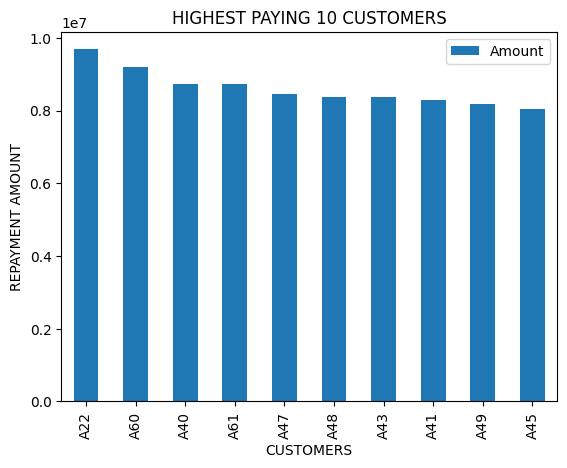

In [20]:
#TASK-3 PLOT
top_10_customers.plot(x='Customer', y='Amount', kind='bar')
plt.xlabel('CUSTOMERS')
plt.ylabel('REPAYMENT AMOUNT')
plt.title('HIGHEST PAYING 10 CUSTOMERS')

Text(0.5, 1.0, 'IN WHICH SEGMENT PEOPLE ARE SPENDING MORE MONEY')

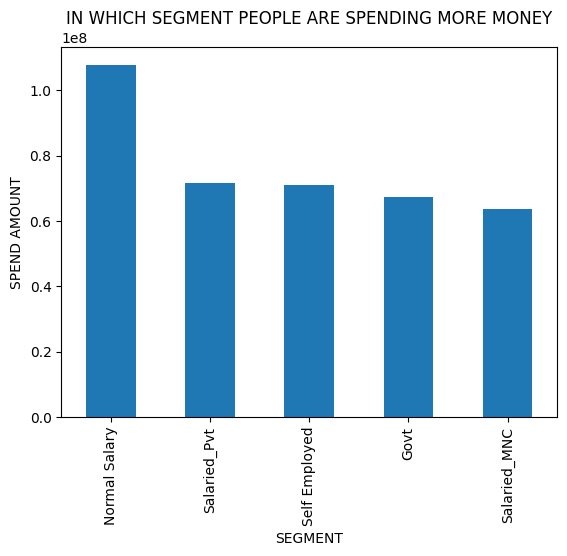

In [89]:
#TASK-4 PLOT
segment_spending.plot(kind='bar')
plt.xlabel('SEGMENT')
plt.ylabel('SPEND AMOUNT')
plt.title('IN WHICH SEGMENT PEOPLE ARE SPENDING MORE MONEY')

Text(0.5, 1.0, 'WHICH AGE GROUP IS SPENDING MORE MONEY')

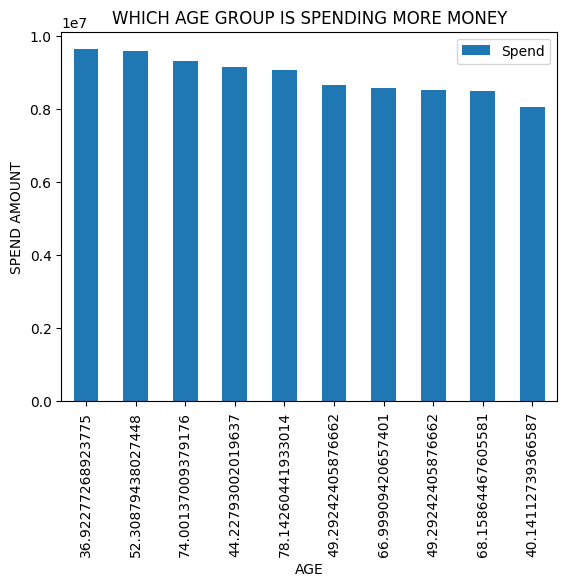

In [21]:
#TASK-5 PLOT
age_spending.plot(x='Age', y='Spend', kind='bar')
plt.xlabel('AGE')
plt.ylabel('SPEND AMOUNT')
plt.title('WHICH AGE GROUP IS SPENDING MORE MONEY')

Text(0.5, 1.0, 'WHICH IS THE MOST PROFITABLE SEGMENT')

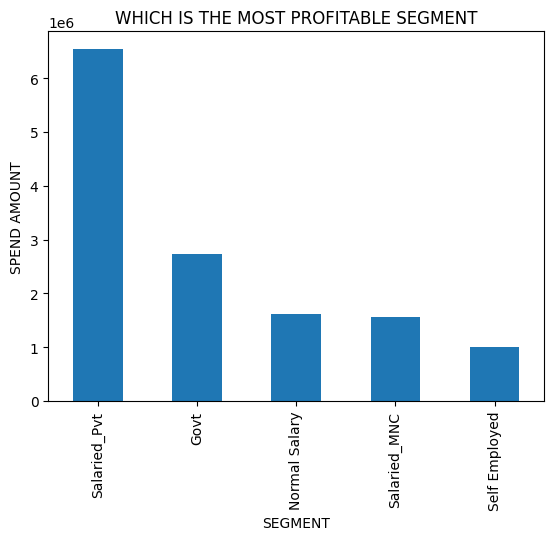

In [23]:
#TASK-6 PLOT
profitable_segment.plot(x='Segment', y='Profit', kind='bar')
plt.xlabel('SEGMENT')
plt.ylabel('SPEND AMOUNT')
plt.title('WHICH IS THE MOST PROFITABLE SEGMENT')

Text(0.5, 1.0, 'IN WHICH CATEGORY CUSTOMERS ARE SPENDING MORE MONEY')

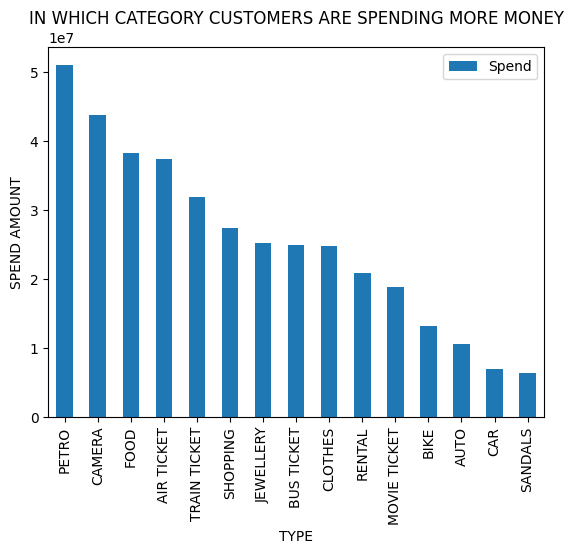

In [24]:
#TASK-7 PLOT
categoryspend_df.plot(x='Type', y='Spend', kind='bar')
plt.xlabel('TYPE')
plt.ylabel('SPEND AMOUNT')
plt.title('IN WHICH CATEGORY CUSTOMERS ARE SPENDING MORE MONEY')

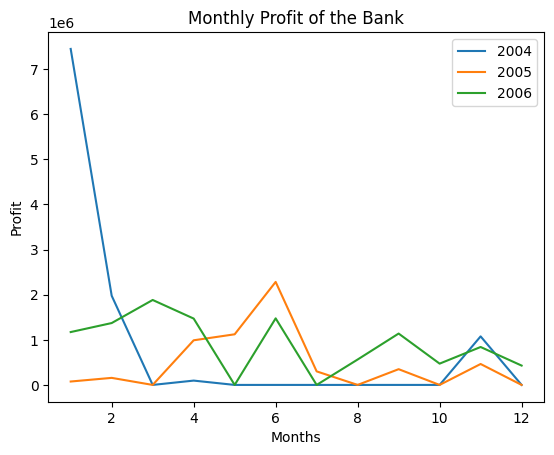

In [26]:
#TASK-8 PLOT
pivot_table = monthly_profit.pivot(index='Month', columns='Year', values='Profit')
pivot_table = pivot_table.fillna(0)
pivot_table.plot()

plt.xlabel('Months')
plt.ylabel('Profit')
plt.title('Monthly Profit of the Bank')

plt.legend()
plt.show()

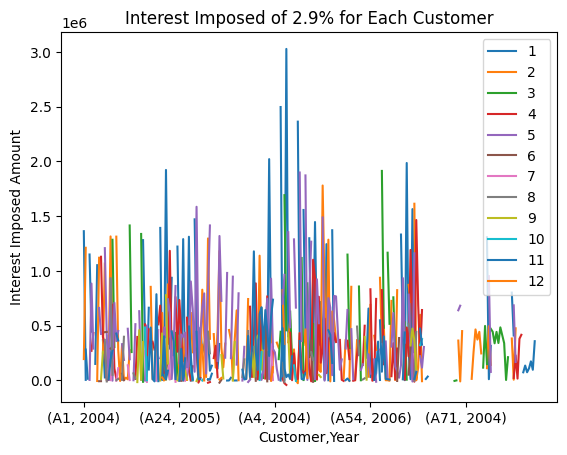

In [27]:
pivot_table = interest_data.pivot(index=['Customer','Year'], columns='Month', values='Amount')
pivot_table.plot()

plt.xlabel('Customer,Year')
plt.ylabel('Interest Imposed Amount')
plt.title('Interest Imposed of 2.9% for Each Customer')

plt.legend()
plt.show()

In [28]:
#Exporting Output to Excel Sheets
with pd.ExcelWriter('Output.xlsx') as writer:
    data_df.to_excel(writer, sheet_name='Data Cleaning Task-1')
    merged_data.to_excel(writer, sheet_name='Data Cleaning Task-2')
    monthly_spend.to_excel(writer, sheet_name='Task-1')
    monthly_repayment.to_excel(writer, sheet_name='Task-2')
    top_10_customers.to_excel(writer, sheet_name='Task-3')
    top_segment.to_excel(writer, sheet_name='Task-4')
    highest_age_spending.to_excel(writer, sheet_name='Task-5')
    top_profitable_segment.to_excel(writer, sheet_name='Task-6')
    highest_category.to_excel(writer, sheet_name='Task-7')
    monthly_profit.to_excel(writer, sheet_name='Task-8')
    interest_data.to_excel(writer, sheet_name='Task-9')